<a href="https://colab.research.google.com/github/Suruchi-cmd/Heart-rate-monitoring/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary modules
import pandas as pd
import numpy as np
import os
#waveform-database:A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb

%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)

MAIN_PATH = "/home/Suruchi/Documents/MajorProject"
DATA_PATH = "/home/Suruchi/Documents/MajorProject/mit-database"
FIG_PATH="/home/Suruchi/Desktop/ECG-Heart-mate"
FIGURE_PATH = os.path.join(FIG_PATH,"figures_2")
os.makedirs("figures_2",exist_ok=True)
os.chdir(DATA_PATH)

In [ ]:
sample = wfdb.io.rdsamp("101")

In [ ]:
print(sample)

(array([[-0.345, -0.16 ],
       [-0.345, -0.16 ],
       [-0.345, -0.16 ],
       ...,
       [-0.295, -0.11 ],
       [-0.29 , -0.11 ],
       [ 0.   ,  0.   ]]), {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V1'], 'comments': ['75 F 1011 654 x1', 'Diapres']})


In [ ]:
sample_file=sample[0]
print(sample_file.shape)
print(type(sample_file))
print(sample_file)

(650000, 2)
<class 'numpy.ndarray'>
[[-0.345 -0.16 ]
 [-0.345 -0.16 ]
 [-0.345 -0.16 ]
 ...
 [-0.295 -0.11 ]
 [-0.29  -0.11 ]
 [ 0.     0.   ]]


In [ ]:
sample_MLII = sample_file[:,0]
sample_V5 = sample_file[:,1]
annotation_101_MLII=wfdb.rdann("101", 'atr')

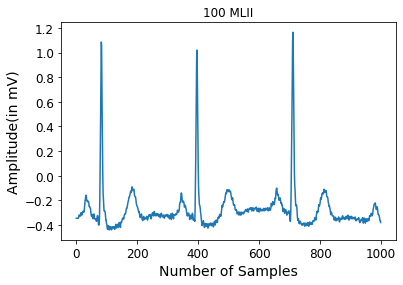

In [ ]:
plt.plot(sample_MLII[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 MLII")
#abc = os.path.join(FIGURE_PATH,"101-MLII")
#plt.savefig("abc",dpi=300, format='png')

plt.savefig("/home/Suruchi/Desktop/ECG-Heart-mate/figures_2/101-MLII.png")

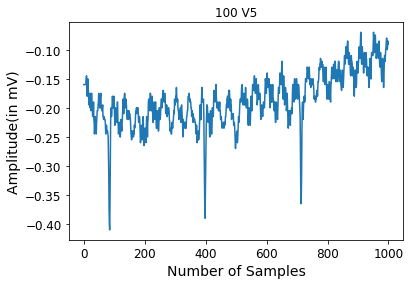

In [ ]:
plt.plot(sample_V5[:1000])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("100 V5")
plt.savefig("/home/Suruchi/Desktop/ECG-Heart-mate/figures_2/101-MLII.png")

In [ ]:
records = np.loadtxt(os.path.join(DATA_PATH,"RECORDS"), dtype=str)

In [ ]:
print(records)
print(len(records))

['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '124' '200'
 '201' '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215'
 '217' '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
48


In [ ]:
def read_data():
    dataset = []
    for record in records:
        temp = wfdb.rdrecord(record)
        dataset.append(temp.p_signal)
    return dataset

In [ ]:
dataset = read_data()

In [ ]:
dataset[47]

array([[-0.08 ,  0.135],
       [-0.08 ,  0.135],
       [-0.08 ,  0.135],
       ...,
       [-0.395,  0.075],
       [-0.38 ,  0.08 ],
       [ 0.   ,  0.   ]])

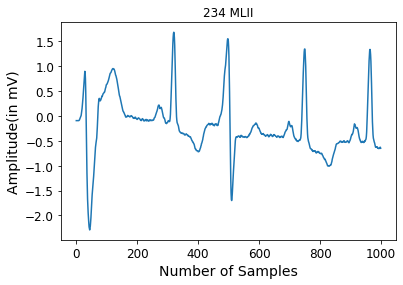

In [ ]:
#Plotting the second last record MLII data
plt.plot(dataset[46][:1000,0])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 MLII")
plt.savefig("/home/Suruchi/Desktop/ECG-Heart-mate/figures_2/235-MLII.png")

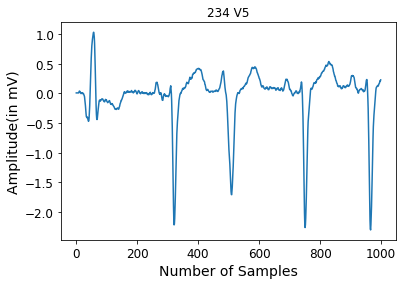

In [ ]:
#PLotting the second last record V5 data
plt.plot(dataset[46][:1000,1])
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude(in mV)")
plt.title("234 V5")
plt.savefig("/home/Suruchi/Desktop/ECG-Heart-mate/figures_2/234-V5.png")

In [ ]:
#Showing all the labels present in our data
wfdb.io.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [ ]:
invalid_beat = [
    "[", "!", "]", "x", "(", ")", "p", "t",
    "u", "`", "'", "^", "|", "~", "+", "s",
    "T", "*", "D", "=",'"', "@", "B", "a", "J", "S",
    "r", "F", "e", "j", "n", "f", "Q", "?"
]

label_beats=[
    "A", "L", "/", "V", "R", "E", "N"
]

In [ ]:
def classify(symbol):
    if symbol in label_beats:
        return 1
    else:
        return 0

def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]

    return samp'''
    return samp

all_signals=[]
all_labels=[]
for record in records:
    temp=wfdb.rdrecord(record)
    annot_temp=wfdb.rdann(record, 'atr')
    ann_sample=annot_temp.sample
    ann_symbol=annot_temp.symbol
    fs=temp.fs
    signal=temp.p_signal
    signal_MLII=signal[:,0]
    for i, i_sample in enumerate(ann_sample):
        label_dec=classify(ann_symbol[i])
        segmentation=segment(signal_MLII, i_sample)
        if label_dec==1 and len(segmentation)==360:
            all_signals.append(segmentation)
            all_labels.append(ann_symbol[i])


In [ ]:
# vstack Stacks arrays in sequence vertically (row wise).
all_signals_fin=np.vstack(all_signals)

In [ ]:
print(all_signals_fin.shape)

(107141, 360)


N


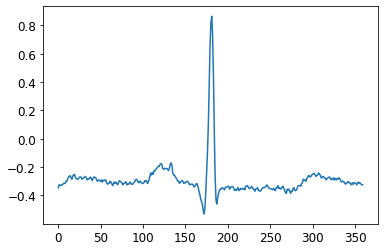

In [ ]:
#PLotting
plt.plot(all_signals_fin[10])
print(all_labels[10])

# Resampling

In [ ]:
labels_fin=pd.Series(all_labels)

In [ ]:
len(all_signals_fin)
labels_array=np.array(all_labels)

In [ ]:
df_0=all_signals_fin[labels_fin=='/']
df_1=all_signals_fin[labels_fin=='A']
df_2=all_signals_fin[labels_fin=='E']
df_3=all_signals_fin[labels_fin=='L']
df_4=all_signals_fin[labels_fin=='N']
df_5=all_signals_fin[labels_fin=='R']
df_6=all_signals_fin[labels_fin=='V']
y_df0=labels_array[labels_fin=='/']
print(len(df_0))
print(y_df0)
len(y_df0)

7023
['/' '/' '/' ... '/' '/' '/']


7023

In [ ]:
from sklearn.utils import resample

In [ ]:
df0_sampled=resample(df_0, replace=True, n_samples=20000, random_state=42)
df1_sampled=resample(df_1, replace=True, n_samples=20000, random_state=42)
df2_sampled=resample(df_2, replace=True, n_samples=20000, random_state=42)
df3_sampled=resample(df_3, replace=True, n_samples=20000, random_state=42)
df4_sampled=resample(df_4, replace=True, n_samples=20000, random_state=42)
df5_sampled=resample(df_5, replace=True, n_samples=20000, random_state=42)
df6_sampled=resample(df_6, replace=True, n_samples=20000, random_state=42)


In [ ]:
print(len(df0_sampled))
print(len(df1_sampled))
print(len(df2_sampled))
print(len(df3_sampled))
print(len(df4_sampled))
print(len(df5_sampled))
print(len(df6_sampled))

20000
20000
20000
20000
20000
20000
20000


In [ ]:
y_0=['/']*len(df0_sampled)
y_1=['A']*len(df1_sampled)
y_2=['E']*len(df2_sampled)
y_3=['L']*len(df3_sampled)
y_4=['N']*len(df4_sampled)
y_5=['R']*len(df5_sampled)
y_6=['V']*len(df6_sampled)


In [ ]:
X_final=[]
X_final.extend(df0_sampled)
X_final.extend(df1_sampled)
X_final.extend(df2_sampled)
X_final.extend(df3_sampled)
X_final.extend(df4_sampled)
X_final.extend(df5_sampled)
X_final.extend(df6_sampled)

In [ ]:
print(len(X_final))

140000


In [ ]:
y_final=[]
y_final.extend(y_0)
y_final.extend(y_1)
y_final.extend(y_2)
y_final.extend(y_3)
y_final.extend(y_4)
y_final.extend(y_5)
y_final.extend(y_6)

In [ ]:
len(y_final)

140000

In [ ]:
X_final[1]

array([ 0.6  ,  0.59 ,  0.57 ,  0.545,  0.51 ,  0.465,  0.42 ,  0.395,
        0.375,  0.34 ,  0.295,  0.24 ,  0.205,  0.17 ,  0.135,  0.105,
        0.06 ,  0.02 , -0.025, -0.055, -0.08 , -0.115, -0.15 , -0.195,
       -0.21 , -0.235, -0.26 , -0.28 , -0.325, -0.335, -0.35 , -0.38 ,
       -0.375, -0.395, -0.42 , -0.435, -0.445, -0.445, -0.445, -0.47 ,
       -0.47 , -0.475, -0.485, -0.475, -0.48 , -0.49 , -0.51 , -0.505,
       -0.505, -0.515, -0.5  , -0.505, -0.515, -0.515, -0.515, -0.51 ,
       -0.51 , -0.51 , -0.515, -0.525, -0.53 , -0.51 , -0.505, -0.515,
       -0.515, -0.525, -0.525, -0.505, -0.5  , -0.505, -0.5  , -0.515,
       -0.515, -0.49 , -0.49 , -0.475, -0.475, -0.485, -0.49 , -0.48 ,
       -0.48 , -0.46 , -0.465, -0.47 , -0.475, -0.46 , -0.455, -0.45 ,
       -0.47 , -0.465, -0.455, -0.455, -0.45 , -0.45 , -0.45 , -0.46 ,
       -0.465, -0.465, -0.45 , -0.47 , -0.465, -0.47 , -0.455, -0.47 ,
       -0.46 , -0.465, -0.475, -0.47 , -0.48 , -0.46 , -0.47 , -0.47 ,
      

# Standarization


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled=scaler.fit_transform(X_final)

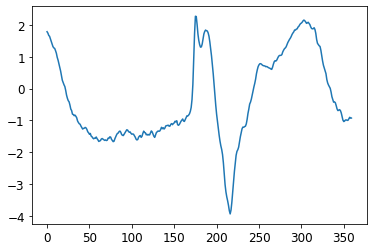

In [ ]:
plt.plot(scaled[10])


In [ ]:
scaled.shape

(140000, 360)

# Processing data


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
strad=StratifiedShuffleSplit()

In [ ]:
assin_strad=strad.split(scaled, y_final)

In [ ]:
train_index, test_index=next(assin_strad)

In [ ]:
train_data_scaled=scaled[train_index]


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [ ]:
labels_final=lab.fit_transform(y_final)

In [ ]:
lab.classes_

array(['/', 'A', 'E', 'L', 'N', 'R', 'V'], dtype='<U1')

In [ ]:
train_label=labels_final[train_index]

In [ ]:
train_label.shape

(126000,)

In [ ]:
assin_val=strad.split(train_data_scaled, train_label)

In [ ]:
train_index_fin, val_index=next(assin_val)

In [ ]:
val_index.shape

(12600,)

In [ ]:
train_index_fin.shape

(113400,)

In [ ]:
test_index.shape

(14000,)

In [ ]:
X_val=train_data_scaled[val_index]

In [ ]:
X_val.shape

(12600, 360)

In [ ]:
train_data_scaled_fin=train_data_scaled[train_index_fin]

In [ ]:
train_data_scaled_fin.shape

(113400, 360)

In [ ]:
train_labels_fin=train_label[train_index_fin]

In [ ]:
y_val.shape

(12600,)

In [ ]:
y_val=train_label[val_index]

In [ ]:
test_data_scaled=scaled[test_index]

In [ ]:
test_labels=labels_final[test_index]

# Saving Trained models

In [ ]:
import os
MODEL_PATH = os.path.join(FIG_PATH,"saved_models")
os.makedirs("saved_models",exist_ok=True)

import pickle

# a function to save trained models in pickle object
def save_model(name,model,extension=".pickle"):
    path = os.path.join(MODEL_PATH,name+extension)
    print("Saving Model : ",name)
    file = open(path,"wb")
    pickle.dump(model,file)
    file.close()

In [ ]:
#save_model("KNN_CLASSIFIER",knn)
#save_model("LOGISTIC_CLASSIFIER",log)
#save_model("SVM_CLASSIFIER", Cls)

# CNN

In [ ]:
from tensorflow import keras
CNN_X_train=train_data_scaled_fin.reshape(len(train_data_scaled_fin), len(train_data_scaled_fin[0]), 1)
CNN_val=X_val.reshape(len(X_val), len(X_val[0]), 1)


In [ ]:
train_labels_fin.shape

(113400,)

In [ ]:

#def CNN_Classifier(X_train, y_train, X_test, y_test):


CNN_model = keras.Sequential()
CNN_model.add(keras.layers.Conv1D(64,kernel_size=3,input_shape=(360,1),activation="relu"))
CNN_model.add(keras.layers.MaxPool1D(pool_size=2))
CNN_model.add(keras.layers.Conv1D(filters=32,kernel_size=3,activation="relu"))
CNN_model.add(keras.layers.MaxPool1D(pool_size=2))
CNN_model.add(keras.layers.Flatten())
CNN_model.add(keras.layers.Dense(100,activation="relu"))
CNN_model.add(keras.layers.Dense(7,activation="softmax"))
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False)
opt=keras.optimizers.Adam(lr=0.0001)
CNN_model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
CNN_model.summary()
    #X_train=X_train.reshape(len(X_train), len(X_train[0]), 1)
    #X_test=X_test.reshape(len(X_test), len(X_test[0]), 1)
history=CNN_model.fit(CNN_X_train, train_labels_fin, epochs=25, batch_size=50, validation_data=(CNN_val, y_val))
    #max_val_acc=max(history.history['accuracy'])

    #return CNN_model.evaluate(X_test, y_test)[1]

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 358, 64)           256       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 179, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 177, 32)           6176      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 88, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               281700    
_________________________________________________________________
dense_9 (Dense)              (None, 7)                

def K_fold_CV(X_new,Y_new,K=10):
    kfold = StratifiedKFold(n_splits=K,random_state=42)
    acc = []
    for train_id,test_id in kfold.split(X_new,Y_new):
        acc.append(CNN_Classifier(np.array(X_new[train_id]),np.array(Y_new[train_id]),np.array(X_new[test_id]),np.array(Y_new[test_id])))
    return np.array(acc)


In [ ]:
len(labels_final)

140000

acc=K_fold_CV(scaled, labels_final)
print(acc)

In [ ]:
cnn_prediction = CNN_model.predict_classes(CNN_X_train)

In [ ]:
CNN_X_train[1]

In [ ]:
print(cnn_prediction[0:10])

[3 0 6 5 1 4 4 0 5 3]


In [ ]:
print(train_label[0:10])

[3 0 6 5 1 4 4 0 5 3]


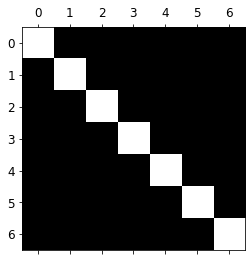

In [ ]:
from sklearn.metrics import confusion_matrix

cnn_conf_matrix = confusion_matrix(train_labels_fin,cnn_prediction,normalize="true")
plt.matshow(cnn_conf_matrix*250, cmap="gray")
plt.savefig("/home/Suruchi/Desktop/ECG-figures/figures_2/CNN_Scaled_CM.png")
plt.show()

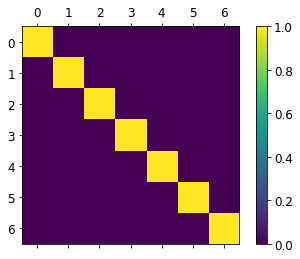

In [ ]:
figure=plt.figure()
axes=figure.add_subplot(111)
caxes=axes.matshow(cnn_conf_matrix, interpolation='nearest')
figure.colorbar(caxes)
plt.show()

In [ ]:
confusion_matrix(train_labels_fin,cnn_prediction)

array([[16194,     0,     0,     6,     0,     0,     0],
       [    0, 16170,     0,     0,    24,     6,     0],
       [    0,     0, 16200,     0,     0,     0,     0],
       [    0,     0,     0, 16189,     4,     0,     7],
       [    0,    29,     2,     9, 16140,    15,     5],
       [    0,     4,     0,     0,     5, 16191,     0],
       [    0,     4,     0,     4,    26,     1, 16165]])

In [ ]:
CNN_X_test=test_data_scaled.reshape(len(test_data_scaled), len(test_data_scaled[0]),1)

In [ ]:
test_loss, test_accuracy = CNN_model.evaluate(CNN_X_test, test_labels)

14000/14000 [==============================] - 4s 299us/sample - loss: 0.0195 - accuracy: 0.9964


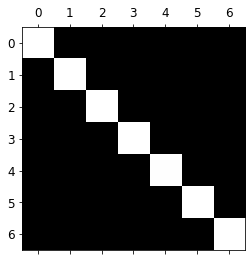

In [ ]:
cnn_conf_matrix_test = confusion_matrix(test_labels,CNN_model.predict_classes(CNN_X_test),normalize="true")
plt.matshow(cnn_conf_matrix*250,cmap="gray")
plt.savefig("/home/Suruchi/Desktop/ECG-figures/figures_2/CNN_Scaled_CM_test.png")
plt.show()

In [ ]:
confusion_matrix(test_labels,CNN_model.predict_classes(CNN_X_test))

array([[2000,    0,    0,    0,    0,    0,    0],
       [   0, 2000,    0,    0,    0,    0,    0],
       [   0,    0, 2000,    0,    0,    0,    0],
       [   1,    0,    0, 1995,    3,    0,    1],
       [   0,   18,    1,    3, 1968,    2,    8],
       [   0,    0,    0,    0,    0, 2000,    0],
       [   0,    2,    0,    3,    4,    0, 1991]])

# Predicting raw data

In [ ]:
import pandas as pd
data=pd.read_csv("/home/Suruchi/Desktop/ECG-Heart-mate/SampleECG_converted.csv", delimiter='\t')

In [ ]:
data_raw=data.iloc[:,2]

In [ ]:
from biosppy.signals import ecg
import biosppy

/home/anisha/anaconda3/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  gs.tight_layout(fig)
/home/anisha/anaconda3/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  gs.tight_layout(fig)
/home/anisha/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


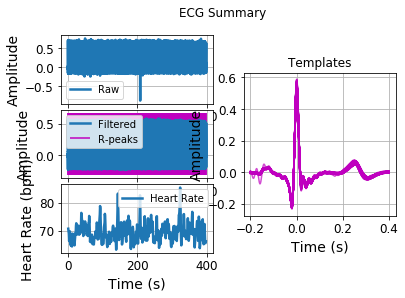

In [ ]:
out = ecg.ecg(signal=data_raw, show=True, sampling_rate=1000)

In [ ]:
r_peak=biosppy.signals.ecg.christov_segmenter(signal=data_raw, sampling_rate=1000)[0]
r_list=r_peak

/home/anisha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [ ]:
r_new=r_list[0:1]

In [ ]:
import numpy as np
data_fin = np.array(data_raw)
signals = []
count = 1
peaks =  biosppy.signals.ecg.christov_segmenter(signal=data_fin, sampling_rate = 1000)[0]
print(peaks)
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    print(x, y)
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]

    return samp'''
    return samp
for i in peaks:
    segmentation=segment(data_fin, i)
    if len(segmentation)==360:
        signals.append(segmentation)


[   249   1113   1932   2831   3727   4647   5466   6312   7240   8175
   9090   9980  10922  11881  12778  13611  14492  15451  16369  17238
  18138  19075  20017  20857  21722  22625  23472  24242  25108  25985
  26863  27670  28506  29408  30288  31094  31918  32834  33723  34520
  35389  36246  37121  37955  38748  39483  40323  41182  41940  42783
  43638  44527  45426  46260  47133  48053  48890  49668  50510  51408
  52231  53035  53907  54795  55615  56496  57388  58257  59028  59888
  60734  61503  62283  63190  64102  65007  65861  66760  67694  68596
  69402  70325  71249  72163  73013  73917  74850  75779  76624  77512
  78434  79289  80109  81016  81930  82781  83549  84402  85275  86192
  87095  87955  88874  89780  90559  91358  92204  92940  93653  94528
  95397  96236  97151  98097  99007  99814 100721 101641 102574 103434
 104244 105099 105927 106716 107469 108326 109225 110129 110973 111849
 112786 113741 114656 115483 116413 117339 118212 119024 119928 120850
 12178

In [ ]:
sig=signals[462]

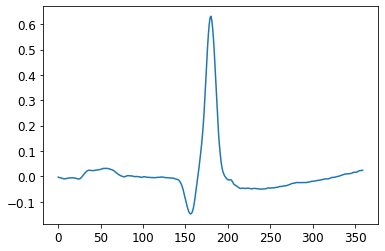

In [ ]:
plt.plot(sig)

In [ ]:
raw_sig=np.vstack(signals)

In [ ]:
scaled_raw=scaler.fit_transform(raw_sig)

In [ ]:
scaled_raw.shape


(463, 360)

In [ ]:
test_raw_data = scaled_raw.reshape(463,360,1)
test_no_scaled=raw_sig.reshape(463, 360, 1)

In [ ]:
predict_this=CNN_model.predict_classes(test_raw_data)
predict_this_no=CNN_model.predict_classes(test_no_scaled)

In [ ]:
predict_this_no[0:453]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
CNN_X_train.shape

(126000, 360, 1)

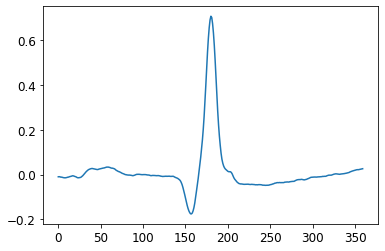

In [ ]:
plt.plot(signals[1])

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
history2=CNN_model.evaluate(CNN_X_test, test_labels)

14000/14000 [==============================] - 3s 195us/sample - loss: 0.0140 - accuracy: 0.9967


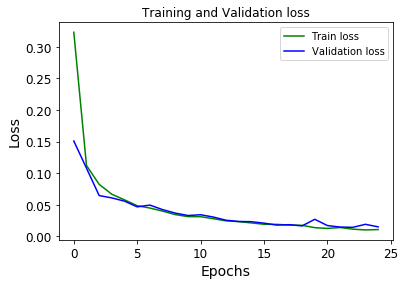

In [ ]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(0, 25)
plt.plot(epochs, loss_train, 'g', label='Train loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/home/anisha/Desktop/ECG-Heart-mate/figures_2/train_val_loss.png")
plt.show()

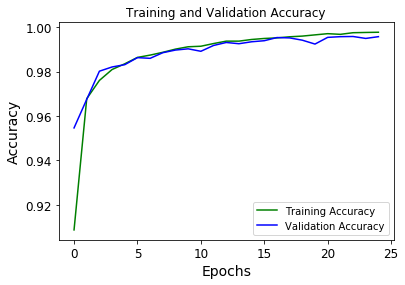

In [ ]:
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(0, 25)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/home/Suruchi/Desktop/ECG-Heart-mate/figures_2/train_val_acc.png")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
predVali=CNN_model.predict_classes(CNN_val)
predTest=CNN_model.predict_classes(CNN_X_test)
print('validation report :', '\n', classification_report(y_val, predVali))
print('validation accuracy:', '\n', accuracy_score(y_val, predVali))
print('Test report :', '\n', classification_report(test_labels, predTest))
print('Test accuracy:', '\n', accuracy_score(test_labels, predTest))

validation report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1800
           1       0.99      1.00      0.99      1800
           2       1.00      1.00      1.00      1800
           3       1.00      1.00      1.00      1800
           4       0.99      0.98      0.99      1800
           5       1.00      1.00      1.00      1800
           6       1.00      0.99      0.99      1800

    accuracy                           1.00     12600
   macro avg       1.00      1.00      1.00     12600
weighted avg       1.00      1.00      1.00     12600

validation accuracy: 
 0.9957142857142857
Test report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       0.99      1.00      0.99      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000
           4       0.99      0.98      0.99      200